Install Julia in Ubuntu
https://ferrolho.github.io/blog/2019-01-26/how-to-install-julia-on-ubuntu

Add Julia Kernel to Jupyter
https://datatofish.com/add-julia-to-jupyter/

Compute Poincare surface of sections
https://juliadynamics.github.io/DynamicalSystems.jl/latest/chaos/orbitdiagram/#Poincar%C3%A9-Surface-of-Section-1

Error with `Plot`
https://github.com/JuliaPlots/Plots.jl/issues/1613

Adding poackages in Julia 

```julia
import Pkg; Pkg.add("PyPlot")

import Pkg; Pkg.add("Plots")
```

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1278


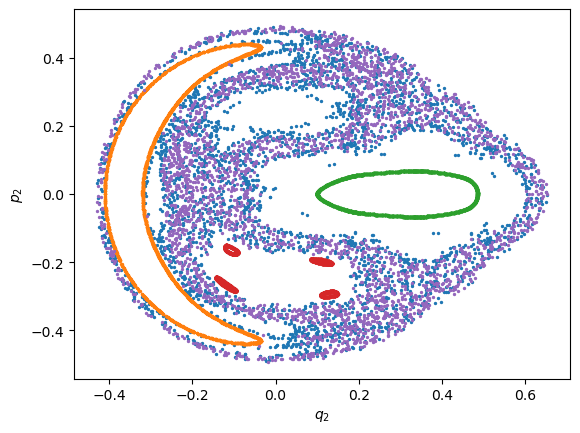

PyObject Text(25.0, 0.5, '$p_2$')

In [7]:
using DynamicalSystems, PyPlot

hh = Systems.henonheiles()

plane = (1, 0.0)
u0s = [[0.0, -0.25, 0.42081, 0.0],
[0.0, -0.31596, 0.354461, 0.0591255],
[0.0, 0.1, 0.5, 0.0],
[0.0, -0.0910355, 0.459522, -0.173339],
[0.0, -0.205144, 0.449328, -0.0162098]]

figure()
for u0 in u0s
    psos = poincaresos(hh, plane, 20000.0; u0 = u0)
    scatter(psos[:, 2], psos[:, 4], s = 2.0)
end
xlabel("\$q_2\$"); ylabel("\$p_2\$")

┌ Info: Saved animation to 
│   fn = /home/ba13026/research/cirque_project_champs/notebooks/tmp.gif
└ @ Plots /home/ba13026/.julia/packages/Plots/uCh2y/src/animation.jl:104


Plots.AnimatedGif("/home/ba13026/research/cirque_project_champs/notebooks/tmp.gif")
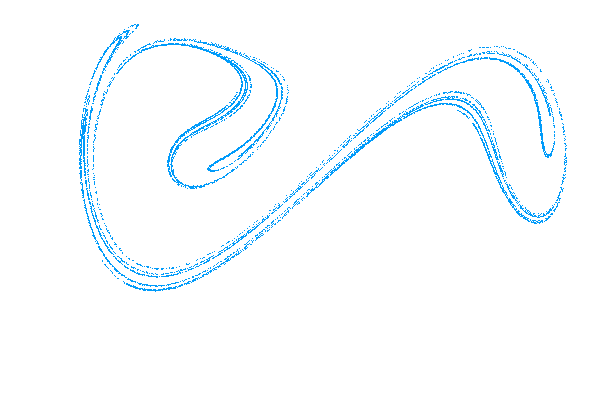

In [1]:
using DynamicalSystems, Plots

ds = Systems.duffing(β = -1, ω = 1, f = 0.3) # non-autonomous chaotic system

frames=120
a = trajectory(ds, 100000.0, dt = 2π/frames, Ttr=20π) # every period T = 2π/ω

orbit_length = div(size(a)[1], frames)
a = Matrix(a)

@gif for i in 1:frames
    orbit_points = i:frames:(orbit_length*frames)
    scatter(a[orbit_points, 1], a[orbit_points, 2], markersize=1, html_output_format=:png,
        leg=false, framestyle=:none, xlims=extrema(a[:,1]), ylims=extrema(a[:,2]))
end